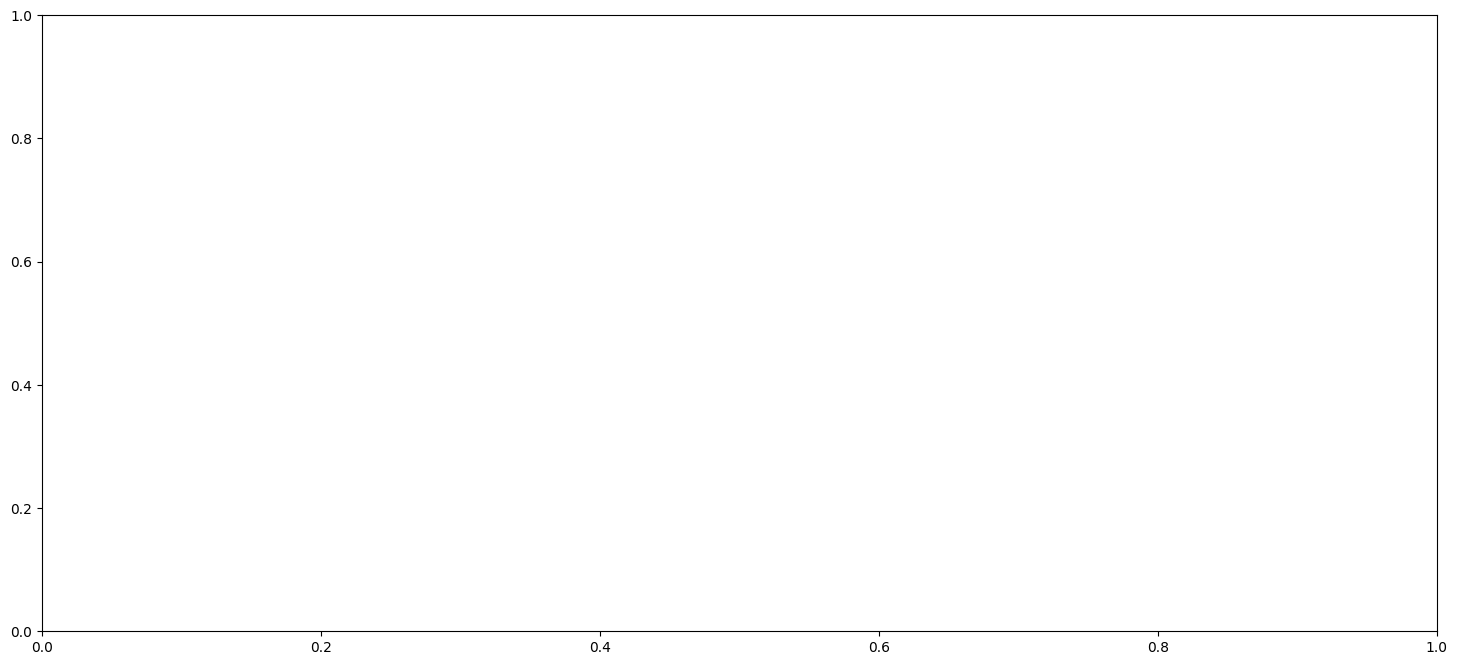

interactive(children=(IntSlider(value=665408, description='Num Samples', max=1330816, min=1), FloatSlider(valu…

In [11]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

# data_path = 'data/input/8h_run.csv'
data_path = 'data/input/measures.csv'

data = pd.read_csv(data_path)


columns_to_keep = widgets.SelectMultiple(
    options=data.columns,
    value=['i_q', 'coolant', 'u_d'],
    rows=10,
    description='Columns to Keep'
)

num_samples_slider = widgets.IntSlider(min=1, max=len(
    data), value=len(data)//2, description='Num Samples')

window_location_slider = widgets.FloatSlider(
    min=0, max=1, value=0.5, step=0.01, description='Window Location')

# normalize data
data["motor_speed"] = data["motor_speed"] / 1000

fig, ax = plt.subplots(figsize=(18, 8))


def update_plot(num_samples, window_location, columns_to_keep):
    ax.clear()  # Clear the existing plot
    # Calculate start index
    start = int(window_location * (len(data) - num_samples))
    end = start + num_samples  # Calculate end index
    # Plot only the selected columns
    for feature in set(data.columns) & set(columns_to_keep):
        ax.plot(data[feature][start:end], label=feature)
    ax.legend(loc='best')  # Add a legend
    ax.set_xlim(start, end)  # Set the x-axis limits
    display(fig)  # Display the plot


widgets.interactive(update_plot, num_samples=num_samples_slider,
                    window_location=window_location_slider, columns_to_keep=columns_to_keep)

<Axes: >

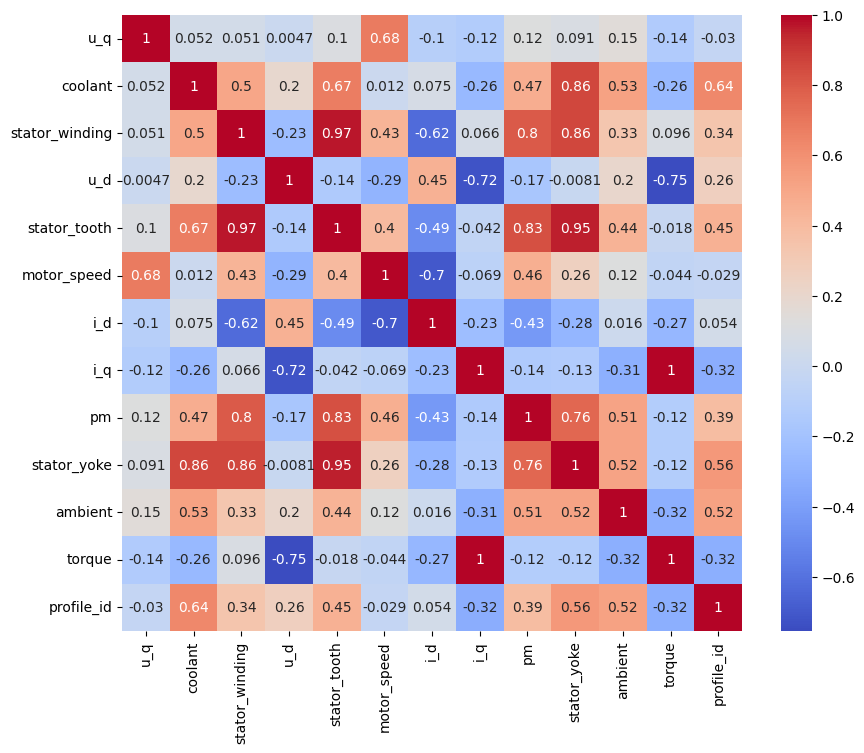

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Increase the size of the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)